<a href="https://colab.research.google.com/github/bgonzalezl/Examenes/blob/main/Examen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagen convertida a HSV y modificada en color:


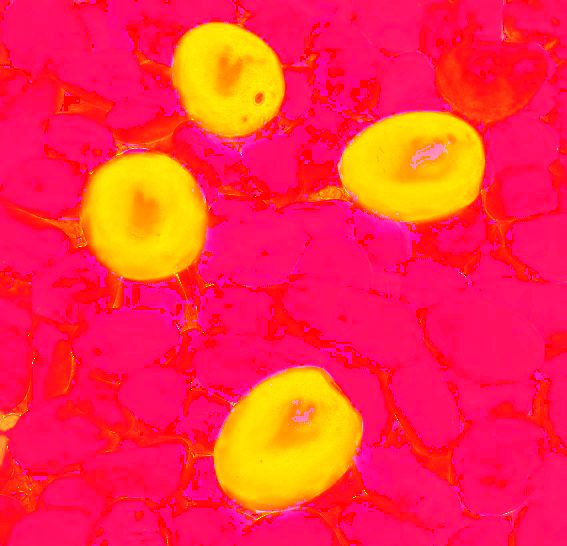

Imagen convertida a RGB desde HSV:


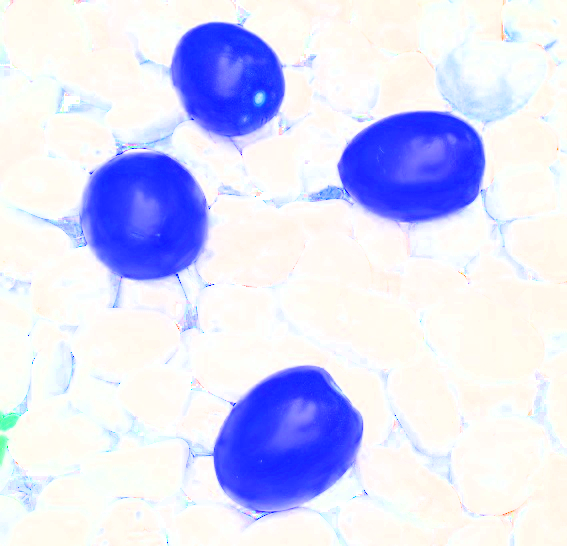

Imagen convertida a grises:


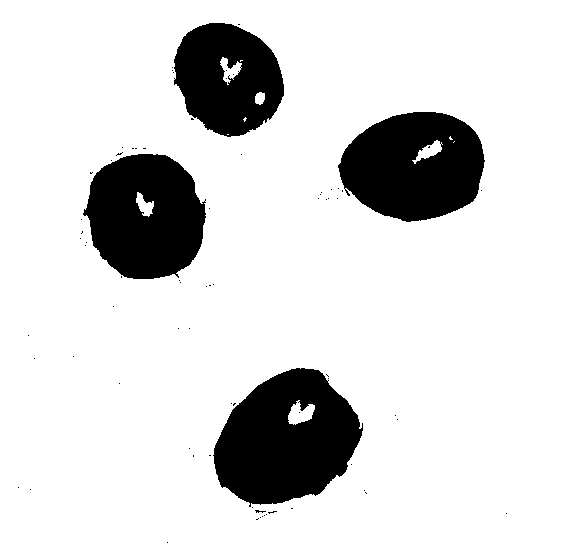

Contorno del objeto  4


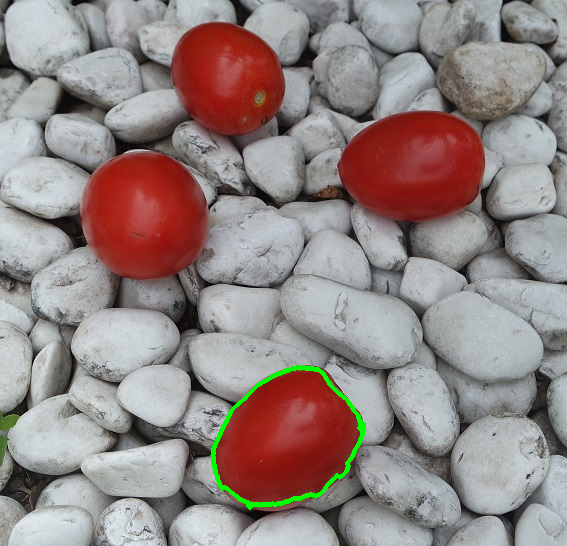

Cuadro del objeto


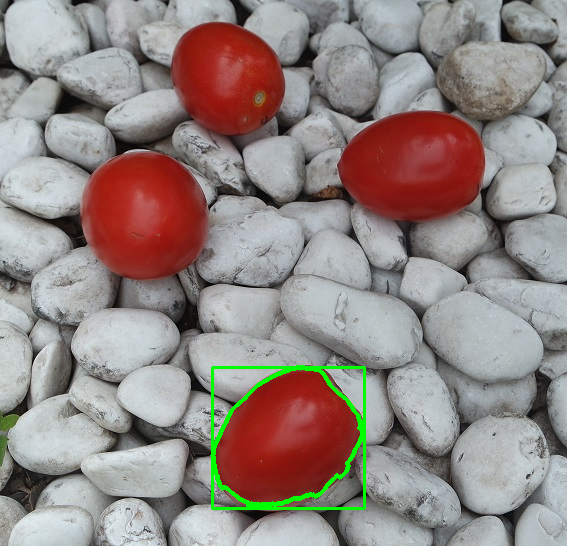

Cuadro ajustado al ancho del objeto


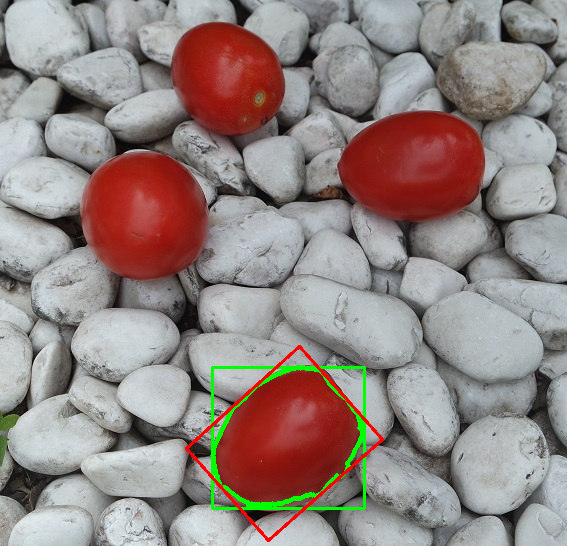

Coordenadas de el objeto  4
[[186 448]
 [299 346]
 [382 439]
 [268 540]]


Coordenada en X1 del segmento del objeto  227
Coordenada en Y1 del segmento del objeto  494
Coordenada en X2 del segmento del objeto  340
Coordenada en Y2 del segmento del objeto  392
(227, 494)
(340, 392)
El segmento 1 que corta al objeto tiene como longitud  199.98499943745782


Contorno del objeto  2


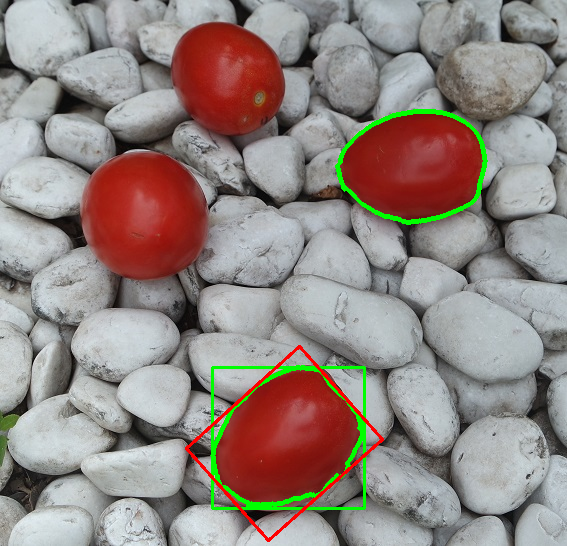

Cuadro del objeto


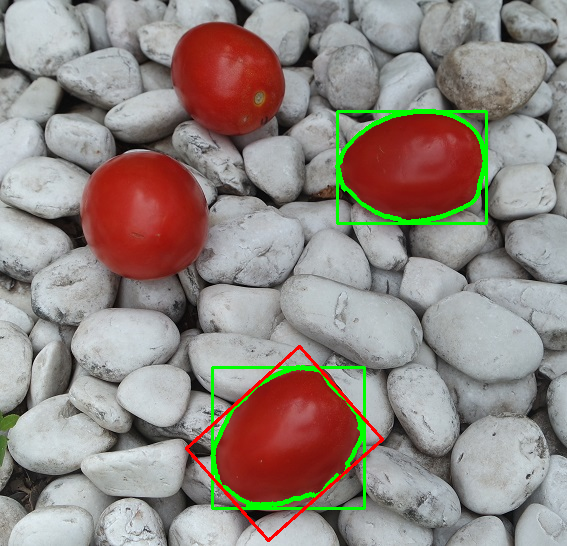

Cuadro ajustado al ancho del objeto


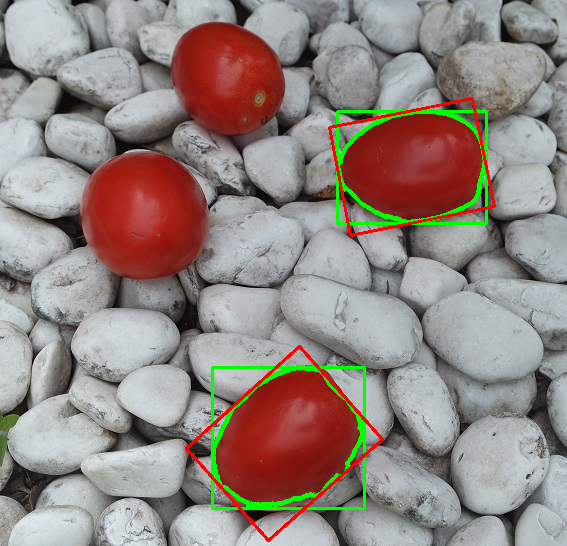

Coordenadas de el objeto  2
[[329 127]
 [472  98]
 [494 206]
 [350 235]]


Coordenada en X1 del segmento del objeto  339
Coordenada en Y1 del segmento del objeto  181
Coordenada en X2 del segmento del objeto  483
Coordenada en Y2 del segmento del objeto  152
(339, 181)
(483, 152)
El segmento 1 que corta al objeto tiene como longitud  236.01906702637396




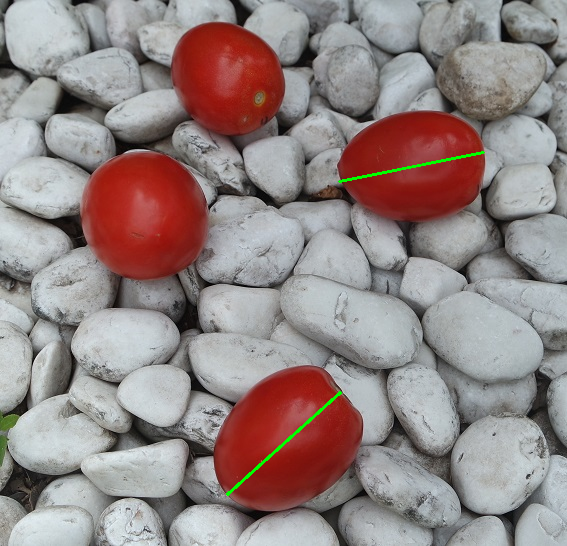

In [ ]:
#Bruno González Lucero
#5BV1
#Visión Artificial
#Examen práctico 2

from re import I
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import math

#CONVIERTE A HSV
def conversion_HSV(img):
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv[...,2] = 255
  print("Imagen convertida a HSV y modificada en color:")
  cv2_imshow(hsv)
  return hsv
#CONVIERTE DE HSV A RGB
def conversion_RGB(hsv):
  img2 = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
  print("Imagen convertida a RGB desde HSV:")
  cv2_imshow(img2)
  return img2
#REALIZA UN UMBRALIZADO
def umbral_gris(img):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(gray, 127, 255, 0)
  print("Imagen convertida a grises:")
  cv2_imshow(thresh)
  return thresh
#BUSCA LOS CONTORNOS DE LOS OBJETOS
def busca_contornos(thresh):
  
  contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                               cv2.CHAIN_APPROX_SIMPLE)
  longest = 0
  sec_lon = 0
  thi_lon = 0
  fou_lon = 0
  fiv_lon = 0

  for i in range(0,len(contours)):
    if(len(contours[i]) > longest):
      longest = len(contours[i])
      index_longest = i
    else:
      if(len(contours[i]) > sec_lon):
        sec_lon = len(contours[i])
        dos_index_longest = i
      else:
        if(len(contours[i]) > thi_lon):
          thi_lon = len(contours[i])
          tre_index_longest = i
        else:
          if(len(contours[i]) > fou_lon):
            fou_lon = len(contours[i])
            cua_index_longest = i
          else:
            if(len(contours[i]) > fiv_lon):
              fiv_lon = len(contours[i])
              cin_index_longest = i

  cnt1 = contours[index_longest]
  x, y, w, h = cv2.boundingRect(cnt1)

  cnt2 = contours[dos_index_longest]
  x2, y2, w2, h2 = cv2.boundingRect(cnt2)

  cnt3 = contours[tre_index_longest]
  x3, y3, w3, h3 = cv2.boundingRect(cnt3)

  cnt6 = contours[72]
  x4, y4, w4, h4 = cv2.boundingRect(cnt6)

  return cnt1, cnt2, cnt3, cnt6
#DIBUJA CONTORNOS Y LINEAS
def dibuja_lineas(cnt1, no_objeto, img,img3):
  
  print("Contorno del objeto ",no_objeto)
  cv2.drawContours(img3, [cnt1], -1, (0,255,0), 3)
  cv2_imshow(img3)
  
  x, y, w, h = cv2.boundingRect(cnt1)
  img3 = cv2.rectangle(img3, (x, y), (x+w, y+h), (0, 255, 0), 2)
  print("Cuadro del objeto")
  cv2_imshow(img3)

  rect1 = cv2.minAreaRect(cnt1)
  box1 = cv2.boxPoints(rect1)
  box1 = np.int0(box1)

  img3 = cv2.drawContours(img3, [box1], 0, (0, 0, 255), 2)
  print("Cuadro ajustado al ancho del objeto")
  cv2_imshow(img3)

  color = (0, 255, 0)
  thickness = 2

  print("Coordenadas de el objeto ", no_objeto)
  print(box1)
  print("\n")

  dist_x_1 = (box1[0][0] + box1[3][0])/2
  dist_x_1 = int(dist_x_1)
  print("Coordenada en X1 del segmento del objeto ",dist_x_1)

  dist_y_1 = (box1[0][1] + box1[3][1])/2
  dist_y_1 = int(dist_y_1)
  print("Coordenada en Y1 del segmento del objeto ",dist_y_1)

  dist_x_2 = (box1[1][0] + box1[2][0])/2
  dist_x_2 = int(dist_x_2)
  print("Coordenada en X2 del segmento del objeto ",dist_x_2)

  dist_y_2 = (box1[1][1] + box1[2][1])/2
  dist_y_2 = int(dist_y_2)
  print("Coordenada en Y2 del segmento del objeto ",dist_y_2)

  start_point1 = (dist_x_1, dist_y_1)
  print(start_point1)
  end_point1 = (dist_x_2, dist_y_2)
  print(end_point1)
  image = cv2.line(img, start_point1, end_point1, color, thickness)
  distance1 = math.sqrt((dist_x_2 - dist_x_1)**2+(dist_y_2 - dist_x_1)**2)
  print("El segmento 1 que corta al objeto tiene como longitud ",distance1)
  print("\n")
  return

#REESCALA EN CASO DE SER NECESARIO
def Redimension(imagen, scala):
    filas, columnas = imagen.shape[:2]
    dsize = (int(filas * scala / 100), int(columnas* scala / 100))
    imagen_redimensionada = cv2.resize(imagen, dsize)
    return imagen_redimensionada

img = cv2.imread("/content/Jit_chiq.JPG", cv2.IMREAD_COLOR)
#Reescalar sólo en caso de ser necesario
#img = Redimension(img,30)
hsv = conversion_HSV(img)
img2 = conversion_RGB(hsv)
gris = umbral_gris(img2)
cnt1, cnt2, cnt3, cnt4 = busca_contornos(gris)
img3 = img.copy()
dibuja_lineas(cnt1, 4, img, img3)
dibuja_lineas(cnt2, 2, img, img3)
cv2_imshow(img)